# Airbnb NYC Price - Regression

## Imports

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin
from sklearn.preprocessing import Imputer

In [5]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [6]:
with open("../pickled_files/dfListings.pkl", 'rb') as picklefile: 
    dfListings = pickle.load(picklefile)

In [7]:
dfListings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,price_Nov16,availability_30_Nov16,availability_60_Nov16,availability_90_Nov16,availability_365_Nov16,price_Dec16,availability_30_Dec16,availability_60_Dec16,availability_90_Dec16,availability_365_Dec16,price_Jan17,availability_30_Jan17,availability_60_Jan17,availability_90_Jan17,availability_365_Jan17,price_Feb17,availability_30_Feb17,availability_60_Feb17,availability_90_Feb17,availability_365_Feb17,price_Mar17,availability_30_Mar17,availability_60_Mar17,availability_90_Mar17,availability_365_Mar17,price_Apr17,availability_30_Apr17,availability_60_Apr17,availability_90_Apr17,availability_365_Apr17,price_May17,availability_30_May17,availability_60_May17,availability_90_May17,availability_365_May17,price_Jun17,availability_30_Jun17,availability_60_Jun17,availability_90_Jun17,availability_365_Jun17,price_Jul17,availability_30_Jul17,availability_60_Jul17,availability_90_Jul17,availability_365_Jul17,price_Aug17,availability_30_Aug17,availability_60_Aug17,availability_90_Aug17,availability_365_Aug17,price_Sep17,availability_30_Sep17,availability_60_Sep17,availability_90_Sep17,availability_365_Sep17,amenities_list,essentials,pool,kitchen,washer,parking,elevator,hot_tub,gym,wifi,tv,heat,AC,fireplace,pets_allowed,lock,apartment,house,loft,townhouse,condo,entire_home,private_room,shared_room,real_bed,distance_from_NYC,zipcode_median_income,zipcode_income_class,zipcode_median_rent,zipcode_rent_class
0,18461891.0,https://www.airbnb.com/rooms/18461891,2.017100e+13,2017-10-03,"Bright, comfortable 1B studio near everything!",*Looking to fill these specific dates: June 24...,Very well illuminated space includes comfortab...,*Looking to fill these specific dates: June 24...,none,There are Michelin-rated restaurants in the ar...,NaN,"Astoria is a safe and quaint neighborhood, and...",IMPORTANT: This space is not suitable for chil...,Arrangements will be made in advance regarding...,NaN,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,https://a0.muscache.com/im/pictures/8ac331a9-3...,916092.0,https://www.airbnb.com/users/show/916092,Connie Mae,2011-08-03,"New York, New York, United States",sensation(URL HIDDEN),NaN,NaN,NaN,0.0,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,https://a0.muscache.com/im/pictures/2bdfa9ca-a...,Astoria,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",1.0,1.0,"Queens, NY, United States",Astoria,Ditmars Steinway,Queens,Queens,NY,11105,New York,"Queens, NY",US,United States,40.774142,-73.9162

## Filter outliers
Properties with price per night > $1k

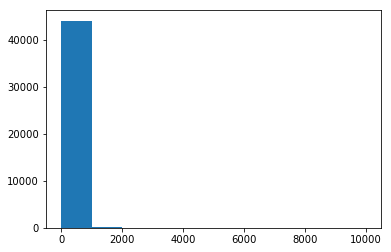

In [8]:
plt.hist(dfListings.price);

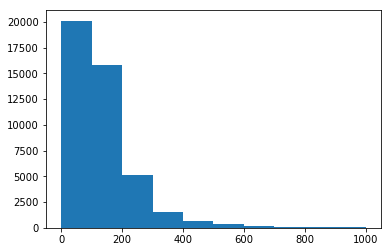

In [9]:
plt.hist(dfListings[dfListings['price'] < 1000].price);

In [10]:
dfListings_cut = dfListings[dfListings['price'] < 1000]

In [11]:
dfListings_cut = dfListings_cut.reset_index()

In [12]:
print(len(dfListings))
print(len(dfListings_cut))

44317
44074


## Define X and y

In [13]:
X_full = dfListings_cut[[
#     'host_is_superhost', #binarized 0-1
#      'host_has_profile_pic', #binarized 0-1
#      'host_identity_verified', #binarized 0-1
     'accommodates', #numerical
     'bathrooms', #numerical
     'bedrooms', #numerical
#      'beds', #numerical
#      'essentials', #binarized 0-1
#      'pool', #binarized 0-1
#      'kitchen', #binarized 0-1
#      'washer', #binarized 0-1
#      'parking', #binarized 0-1
#      'elevator', #binarized 0-1
#      'hot_tub', #binarized 0-1
#      'gym', #binarized 0-1
#      'wifi', #binarized 0-1
#      'tv', #binarized 0-1
#      'heat', #binarized 0-1
#      'AC', #binarized 0-1
#      'fireplace', #binarized 0-1
#      'pets_allowed', #binarized 0-1
#      'lock', #binarized 0-1
#      'apartment', #binarized 0-1
#      'house', #binarized 0-1
#      'loft', #binarized 0-1
#      'townhouse', #binarized 0-1
#      'condo', #binarized 0-1
     'entire_home', #binarized 0-1
     'private_room', #binarized 0-1
     'shared_room', #binarized 0-1
#      'real_bed', #binarized 0-1
     'distance_from_NYC', #numerical
    'zipcode_median_income', #ordinal 1-8
#     'zipcode_median_rent' #ordinal 1-8
                  ]]

In [14]:
y_full = dfListings_cut.price

In [15]:
print(X_full.shape)
print(y_full.shape)

(44074, 8)
(44074,)


## Test-train split

In [16]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_full, y_full, test_size=0.33, random_state=42)

In [17]:
print(X_train_raw.shape)
print(y_train_raw.shape)

print(X_test_raw.shape)
print(y_test_raw.shape)

(29529, 8)
(29529,)
(14545, 8)
(14545,)


## Data imputation
### Check null values

In [18]:
def check_nulls(dataframe, features):
    contains_null = []
    for f in features:
        if dataframe[f].isnull().sum() > 0:
            contains_null.append(f)
    return contains_null

In [19]:
check_nulls(dfListings, X_train_raw.columns)

['bathrooms', 'bedrooms', 'zipcode_median_income']

In [20]:
X_train_raw.isnull().sum()

accommodates               0
bathrooms                103
bedrooms                  51
entire_home                0
private_room               0
shared_room                0
distance_from_NYC          0
zipcode_median_income    411
dtype: int64

In [21]:
y_train_raw.isnull().sum()

0

In [ ]:
# X_train_raw.describe()

### Determine strategy

Evaluate which imputation strategy to use:

In [22]:
def modeVSmean(df, features):
    for f in features:
        print(f, "Mean: ", df[f].mean(), "Mode: ", df[f].mode()[0])

In [23]:
modeVSmean(dfListings, ['bathrooms', 'bedrooms', 'zipcode_median_income'])

bathrooms Mean:  1.1327394562289181 Mode:  1.0
bedrooms Mean:  1.158891601121056 Mode:  1.0
zipcode_median_income Mean:  6285.914806930807 Mode:  3210.0


Features to impute with "most frequent" strategy:
- none

Features to impute with "mean" strategy:
- bathrooms
- bedrooms
- zipcode_median_income

### Build imputation pipeline

Define some custom transformers.

Reference: https://github.com/jem1031/pandas-pipelines-custom-transformers

In [24]:
class DFFeatureUnion(TransformerMixin):
    # FeatureUnion but for pandas DataFrames

    def __init__(self, transformer_list):
        self.transformer_list = transformer_list

    def fit(self, X, y=None):
        for (name, t) in self.transformer_list:
            t.fit(X, y)
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xts = [t.transform(X) for _, t in self.transformer_list]
        Xunion = reduce(lambda X1, X2: pd.merge(X1, X2, left_index=True, right_index=True), Xts)
        return Xunion

In [25]:
class ColumnExtractor(TransformerMixin):

    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        # stateless transformer
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Xcols = X[self.cols]
        return Xcols

In [26]:
class DFImputer(TransformerMixin):
    # Imputer but for pandas DataFrames

    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imp = None
        self.statistics_ = None

    def fit(self, X, y=None):
        self.imp = Imputer(strategy=self.strategy)
        self.imp.fit(X)
        self.statistics_ = pd.Series(self.imp.statistics_, index=X.columns)
        return self

    def transform(self, X):
        # assumes X is a DataFrame
        Ximp = self.imp.transform(X)
        Xfilled = pd.DataFrame(Ximp, index=X.index, columns=X.columns)
        return Xfilled

In [27]:
X_train_raw.columns

Index(['accommodates', 'bathrooms', 'bedrooms', 'entire_home', 'private_room',
       'shared_room', 'distance_from_NYC', 'zipcode_median_income'],
      dtype='object')

In [28]:
ready_features = ['accommodates', 'entire_home', 'private_room', 'shared_room', 'distance_from_NYC']

set1 = ['bathrooms', 'bedrooms', 'zipcode_median_income']

In [29]:
imp_pipeline = Pipeline([
    ('features_to_be_imputed', DFFeatureUnion([
        ('features_ready', Pipeline([
            ('extract', ColumnExtractor(ready_features))
        ])),
        ('features_set1', Pipeline([
            ('extract', ColumnExtractor(set1)),
            ('mode_fill', DFImputer(strategy = 'mean'))
        ])),
    ])),
])

In [30]:
imp_pipeline.fit(X_train_raw)

X_train = imp_pipeline.transform(X_train_raw)
X_test = imp_pipeline.transform(X_test_raw)

In [31]:
print('Train X,y:')
print(X_train_raw.shape)
print(X_train.shape)
print(y_train_raw.shape)
print(' \nTest X,y:')
print(X_test_raw.shape)
print(X_test.shape)
print(y_test_raw.shape)

Train X,y:
(29529, 8)
(29529, 8)
(29529,)
 
Test X,y:
(14545, 8)
(14545, 8)
(14545,)


## Random Forest Regressor Model

In [32]:
model = RandomForestRegressor(n_estimators=150, min_impurity_split=150, min_impurity_decrease=0.01, max_depth=4)

In [33]:
model.fit(X_train, y_train_raw)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.01, min_impurity_split=150,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
y_test_pred = model.predict(X_test)

In [35]:
y_test_pred[0]

69.466304588106922

### Score

In [36]:
model.score(X_test, y_test_raw)

0.53037615635024649

In [37]:
model.score(X_train, y_train_raw)

0.54753165810943683

### Feature Importances

In [38]:
fi = model.feature_importances_

In [39]:
sorted(list(zip(X_train.columns, fi)), key=lambda x: x[1], reverse=True)

[('entire_home', 0.49324830493870392),
 ('bathrooms', 0.24310915970164027),
 ('zipcode_median_income', 0.14374653794749492),
 ('accommodates', 0.06283122573604942),
 ('bedrooms', 0.038892621832338554),
 ('distance_from_NYC', 0.018170245280895857),
 ('shared_room', 1.9045628770840808e-06),
 ('private_room', 0.0)]

###  Predictions

In [40]:
X_full_transformed = imp_pipeline.transform(X_full)

X_full['pred'] = model.predict(X_full_transformed)

X_full['price'] = y_full

X_full['residual'] = X_full['pred'] - X_full['price']

In [41]:
X_full.head()

,accommodates,bathrooms,bedrooms,entire_home,private_room,shared_room,distance_from_NYC,zipcode_median_income,pred,price,residual
0,2,1.0,0.0,1,0,0,10.186191,3074.0,134.931464,110.0,24.931464
1,2,1.0,1.0,0,1,0,23.913715,NaN,72.246923,50.0,22.246923
2,3,1.0,1.0,1,0,0,23.948377,10854.0,204.318340,125.0,79.318340
3,4,1.0,1.0,1,0,0,24.165824,10854.0,204.318340,100.0,104.318340
4,4,3.0,3.0,1,0,0,23.588207,10854.0,469.022977,300.0,169.022977


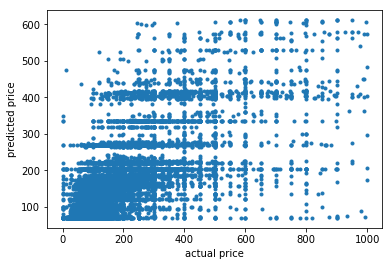

In [42]:
plt.scatter(X_full.price, X_full.pred, marker='.')
plt.xlabel('actual price')
plt.ylabel('predicted price');

### Mean absolute error

In [43]:
errors = X_full.residual.tolist()

In [44]:
errors_abs = [abs(e) for e in errors]

In [45]:
mean_absolute_error = np.mean(errors_abs)

In [46]:
mean_absolute_error

43.681351038080699

### Residual plot

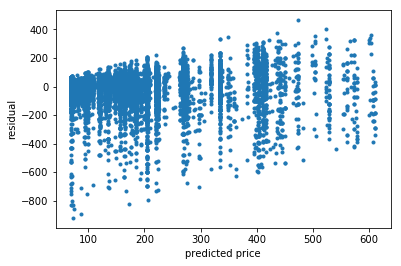

In [47]:
plt.scatter(X_full.pred, X_full.residual, marker='.')
plt.xlabel('predicted price')
plt.ylabel('residual');

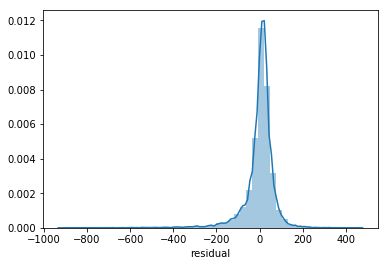

In [48]:
sns.distplot(X_full.residual);

## Tune Model
### Randomized Search CV

In [49]:
model.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [50]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [51]:
from scipy.stats import randint as sp_randint

In [52]:
parameters = {
              'n_estimators': sp_randint(10, 200),
              'max_depth': [3, None],
              'min_impurity_split': sp_randint(2, 200)
              }

In [53]:
grid_rand = RandomizedSearchCV(model,
                               param_distributions = parameters, 
                               n_iter=10)

In [54]:
grid_rand.fit(X_train, y_train_raw)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.01, min_impurity_split=150,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118244da0>, 'max_depth': [3, None], 'min_impurity_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118256860>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [55]:
report(grid_rand.cv_results_)

Model with rank: 1
Mean validation score: 0.533 (std: 0.012)
Parameters: {'max_depth': None, 'min_impurity_split': 187, 'n_estimators': 142}

Model with rank: 2
Mean validation score: 0.530 (std: 0.013)
Parameters: {'max_depth': None, 'min_impurity_split': 161, 'n_estimators': 118}

Model with rank: 3
Mean validation score: 0.528 (std: 0.014)
Parameters: {'max_depth': None, 'min_impurity_split': 78, 'n_estimators': 96}



## XG Boost Regressor

In [56]:
model_xgb = GradientBoostingRegressor(learning_rate=0.01, n_estimators = 400, max_depth=4)

In [57]:
model_xgb.fit(X_train, y_train_raw)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [58]:
y_test_pred_xgb = model_xgb.predict(X_test)

### Score

In [59]:
print("train score: ", model_xgb.score(X_train, y_train_raw))
print("test score: ", model_xgb.score(X_test, y_test_raw))

train score:  0.620497576215
test score:  0.584198743176


### MAE

In [60]:
X_full['pred_xgb'] = model_xgb.predict(X_full_transformed)
X_full['residual_xgb'] = X_full['pred_xgb'] - X_full['price']

In [61]:
X_full.head()

,accommodates,bathrooms,bedrooms,entire_home,private_room,shared_room,distance_from_NYC,zipcode_median_income,pred,price,residual,pred_xgb,residual_xgb
0,2,1.0,0.0,1,0,0,10.186191,3074.0,134.931464,110.0,24.931464,107.212294,-2.787706
1,2,1.0,1.0,0,1,0,23.913715,NaN,72.246923,50.0,22.246923,82.395326,32.395326
2,3,1.0,1.0,1,0,0,23.948377,10854.0,204.318340,125.0,79.318340,161.743857,36.743857
3,4,1.0,1.0,1,0,0,24.165824,10854.0,204.318340,100.0,104.318340,180.092545,80.092545
4,4,3.0,3.0,1,0,0,23.588207,10854.0,469.022977,300.0,169.022977,406.153757,106.153757


In [62]:
errors_xgb = X_full.residual_xgb.tolist()

In [63]:
errors_abs_xgb = [abs(e) for e in errors_xgb]

In [64]:
mean_absolute_error_xgb = np.mean(errors_abs_xgb)

In [65]:
mean_absolute_error_xgb

39.92492549274629

### Tune XGB Model

In [66]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [67]:
from scipy.stats import randint as sp_randint

In [68]:
model_xgb.get_params().keys()

dict_keys(['alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'presort', 'random_state', 'subsample', 'verbose', 'warm_start'])

In [69]:
parameters = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [4, None]
}

In [70]:
grid_rand_xgb = RandomizedSearchCV(model_xgb,
                               param_distributions = parameters, 
                               n_iter=5)

In [71]:
grid_rand_xgb.fit(X_train, y_train_raw)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [4, None]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [72]:
report(grid_rand_xgb.cv_results_)

Model with rank: 1
Mean validation score: 0.602 (std: 0.004)
Parameters: {'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.01}

Model with rank: 2
Mean validation score: 0.600 (std: 0.003)
Parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.01}

Model with rank: 3
Mean validation score: 0.573 (std: 0.003)
Parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.01}



## Pickle the model
Save the model as input in 'web_application' directory.